In [158]:
from ring import RingNetwork

In [159]:
parameters = {
    'D': 1.2,           # internal noise intensity
    'inhibitory_weight': -4,          # E->I synaptic weight
    'excitatory_weight': 10,           # E->E recurrent synaptic weight
    'C': 0.0,           # amplitude of incoming stimuli, a.u.
    'tau_r': 0.01,      # readout time constant, sec
    'tau': 0.01,        # firing rate decay time constant, sec
    'tau_n': 0.1,       # noise correlation time constant, sec
    'tau_rec': 0.1,     # time constant for recovery of synaptic resourses, sec
    'N': 20,           # number of neural populations in the network
}

In [160]:
ring = RingNetwork(U=0.8,
                   model_parameters=parameters)

In [161]:
def sigmoid(input):
    return 10 / (1 + np.exp(-input + 5))

ring.gain_function = sigmoid

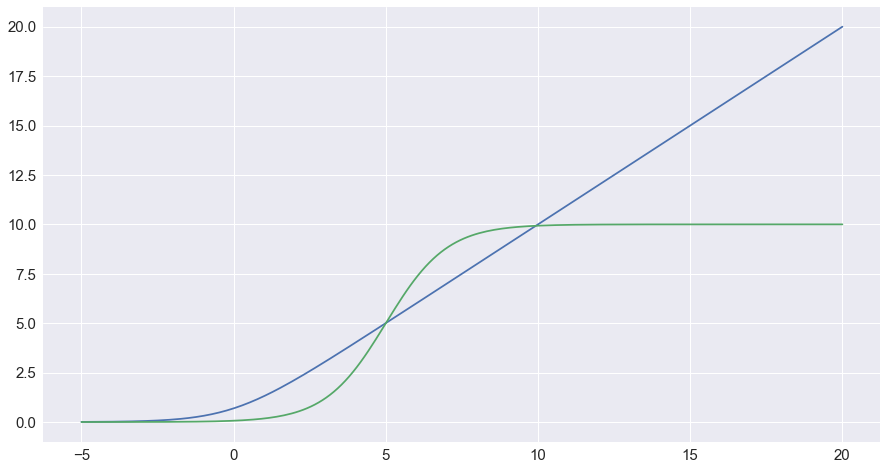

In [162]:
def sigmoid(input):
    return 10 / (1 + np.exp(-input + 5))

def smooth_relu(input):
    return np.log(1 + np.exp(input))
    
inputs = np.linspace(-5, 20, 200)
p.plot(inputs, smooth_relu(inputs))
p.plot(inputs, sigmoid(inputs))

In [163]:
#self_exc = 3.
#ring.W = parameters['excitatory_weight'] * (self_exc * np.eye(ring.N) + \
#                                             np.random.uniform(0, 1, (ring.N, ring.N))) / ring.N

In [164]:
self_exc = 1.
ring.W += self_exc * np.eye(ring.N)

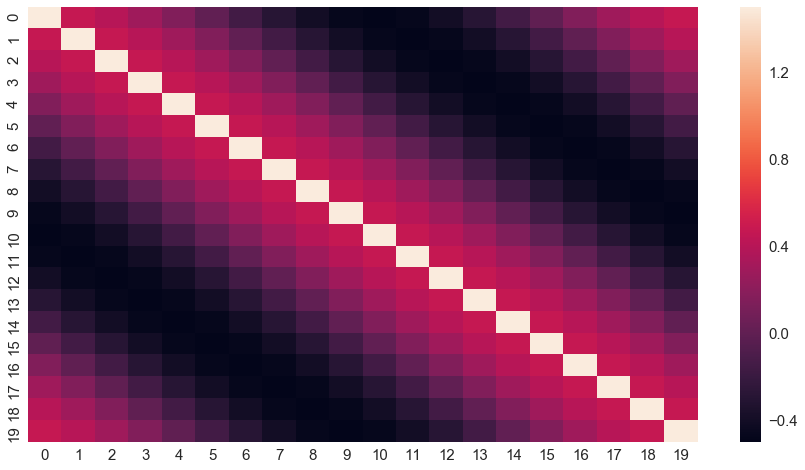

In [165]:
sns.heatmap(ring.W)

In [176]:
ring.I0 = 0.5

In [177]:
ring.integrate(simulation_time=40.0,
               check_readouts=False)

100%|█████████████████████████████████████████| 19999/19999 [00:01<00:00, 12778.79it/s]


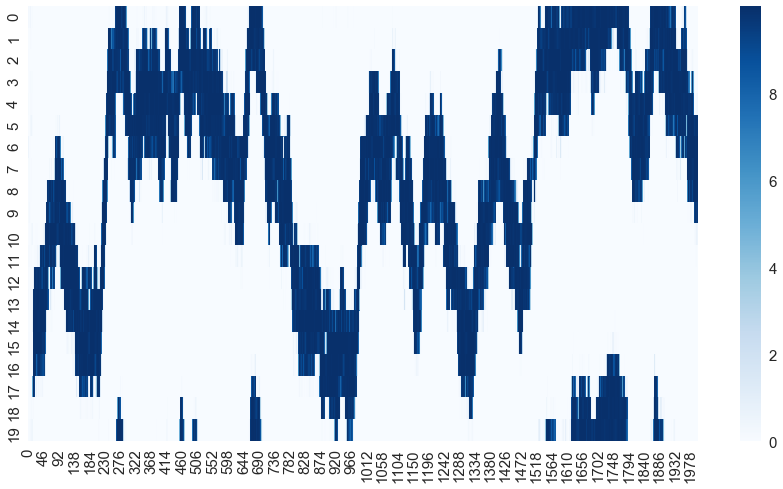

In [178]:
import seaborn as sns
import pylab
pylab.rcParams['figure.figsize'] = 15, 8

sns.heatmap(ring.m_series.T,
            cmap='Blues')

C:\Users\ilazarev\AppData\Local\Continuum\anaconda4\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


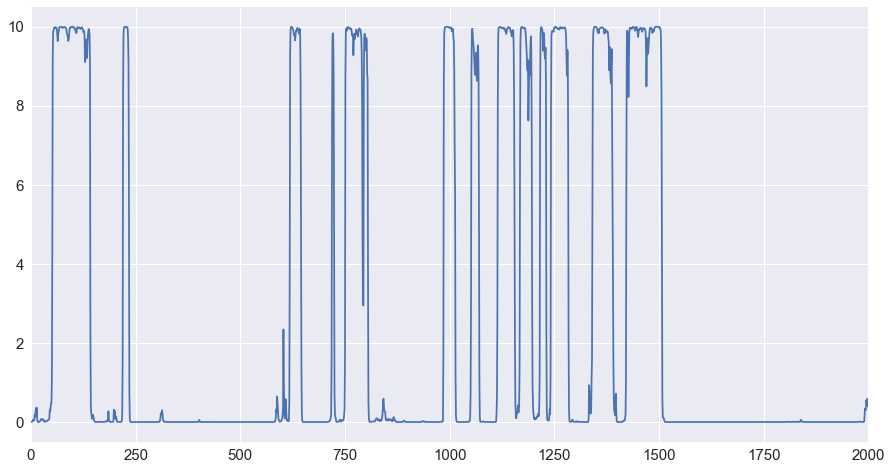

In [181]:
sns.set(font_scale=1.5)
sns.tsplot(ring.m_series[:, 10])

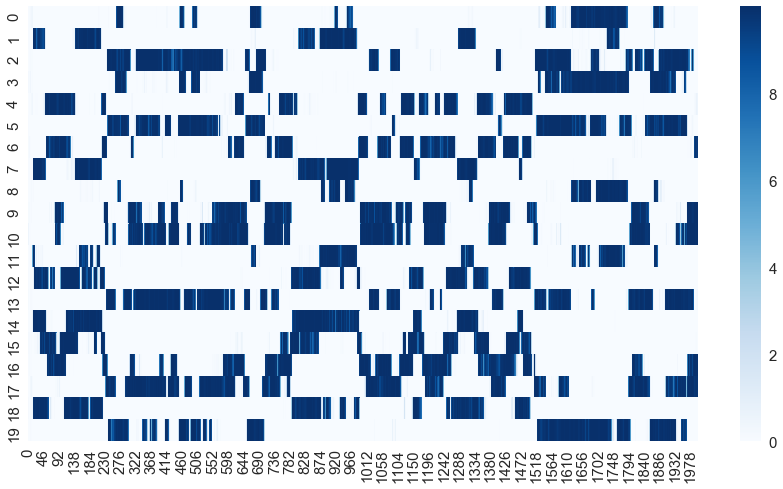

In [200]:
indices = pd.Series(np.random.randint(20, size=100)).value_counts().index.values
sns.heatmap(ring.m_series[:, indices].T,
            cmap='Blues')

100%|█████████████████████████████████████████| 19999/19999 [00:01<00:00, 10994.07it/s]


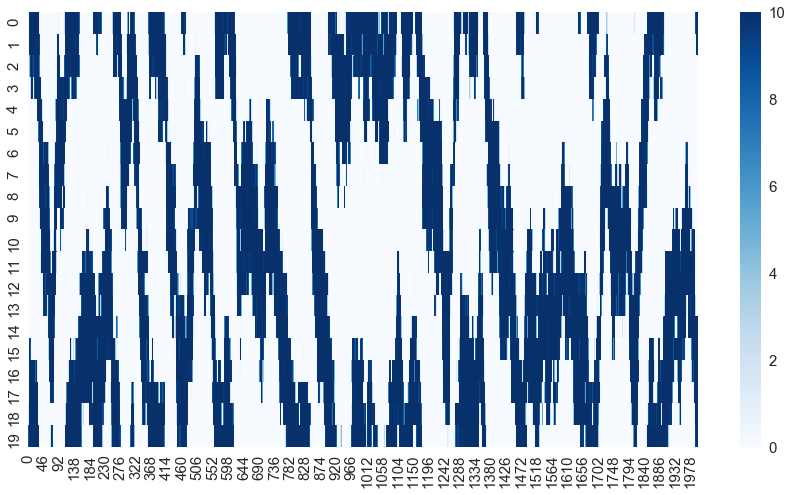

In [258]:
parameters = {
    'D': 3.0,           # internal noise intensity
    'inhibitory_weight': -1,          # E->I synaptic weight
    'excitatory_weight': 10,           # E->E recurrent synaptic weight
    'C': 0.0,           # amplitude of incoming stimuli, a.u.
    'tau_r': 0.01,      # readout time constant, sec
    'tau': 0.01,        # firing rate decay time constant, sec
    'tau_n': 0.1,       # noise correlation time constant, sec
    'tau_rec': 0.1,     # time constant for recovery of synaptic resourses, sec
    'N': 20,           # number of neural populations in the network
}

ring = RingNetwork(U=0.8,
                   model_parameters=parameters)

ring.gain_function = sigmoid

ring.W += self_exc * np.eye(ring.N)

ring.I0 = -1.

ring.integrate(simulation_time=40.0,
               check_readouts=False)

sns.heatmap(ring.m_series.T,
            cmap='Blues')

C:\Users\ilazarev\AppData\Local\Continuum\anaconda4\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


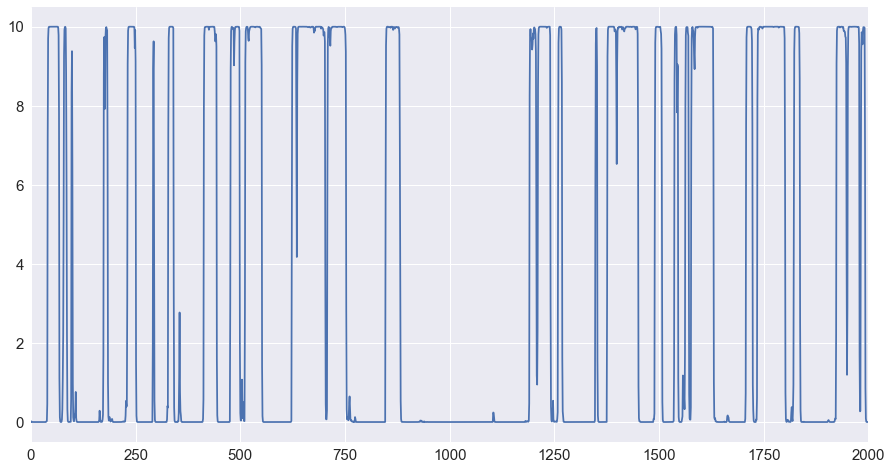

In [259]:
sns.tsplot(ring.m_series[:, 10])